## Observations and Insights 

In [418]:
%matplotlib notebook

In [419]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = mouse_metadata.merge(study_results, on ="Mouse ID")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [420]:
# Checking the number of mice.
mouse_study["Mouse ID"].count()

1893

In [421]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_groupby = mouse_study.groupby(['Mouse ID','Timepoint'])
mouse_groupby.sum()

Age_months  Weight (g)  Tumor Volume (mm3)  \
Mouse ID Timepoint                                               
a203     0                  20          23           45.000000   
         5                  20          23           48.508468   
         10                 20          23           51.852437   
         15                 20          23           52.777870   
         20                 20          23           55.173336   
...                        ...         ...                 ...   
z969     25                  9          30           63.145652   
         30                  9          30           65.841013   
         35                  9          30           69.176246   
         40                  9          30           70.314904   
         45                  9          30           73.867845   

                    Metastatic Sites  
Mouse ID Timepoint                    
a203     0                         0  
         5                         0  
         10                        1  
         15                        1  
         20                        1  
...                              ...  
z969     25                        2  
         30                        3  
         35                        4  
         40                        4  
         45                        4  

[1888 rows x 4 columns]

In [422]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study["Mouse ID"].value_counts()

g989    13
b128    10
u196    10
a685    10
u364    10
        ..
u153     1
f932     1
h428     1
l872     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [423]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_drop = mouse_study.drop_duplicates(subset=['Mouse ID'], keep = 'last')
mouse_drop

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [424]:
# Checking the number of mice in the clean DataFrame.
mouse_drop["Mouse ID"].count()

249

## Summary Statistics

In [425]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

Please see below and advise to me how to make the summary table with numpy. Thanks!

# mean_numpy = np.mean(mouse_drop[['Drug Regimen','Tumor Volume (mm3)']])
# median_numpy = np.median(mouse_drop[['Drug Regimen','Tumor Volume (mm3)']])
# var_numpy = np.var(mouse_drop[['Drug Regimen','Tumor Volume (mm3)']],ddof = 0)
# sd_numpy = np.std(mouse_drop[['Drug Regimen','Tumor Volume (mm3)']],ddof = 0)
# SEM = mouse_drop.sem([['Drug Regimen','Tumor Volume (mm3)']],axis = 1)
# Summary = pd.DataFrame({"Mean":mean_numpy, "Median":median_numpy,"Variance":var_numpy,
#                         "Standard Deviation":sd_numpy,"SEM":SEM})
# Summary            

In [426]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
means = mouse_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = mouse_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = mouse_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdevs = mouse_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = mouse_drop.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

Summary_statistic = pd.DataFrame({"Mean":means, "Median":median,"Variance":var,
                                  "Standard Deviation":stdevs,"SEM":sems
                                 })
Summary_statistic

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar and Pie Charts

In [427]:
mouse_treatment = mouse_study.groupby('Drug Regimen')
mouse_table = mouse_treatment["Mouse ID"].count()
mouse_df = pd.DataFrame(mouse_table)
mouse_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


<IPython.core.display.Javascript object>


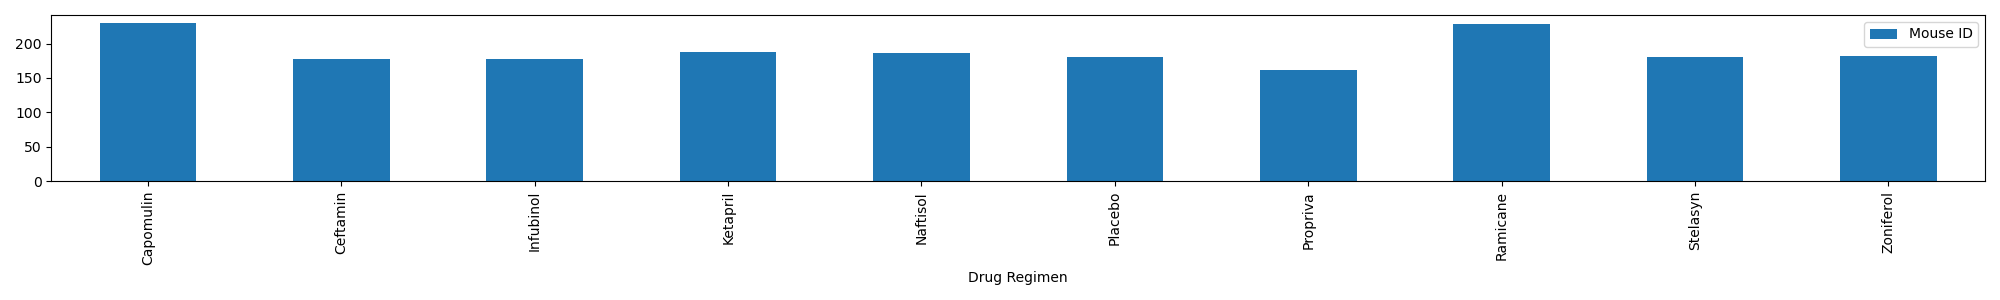

In [428]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_df.plot(kind="bar", figsize=(20,3))
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


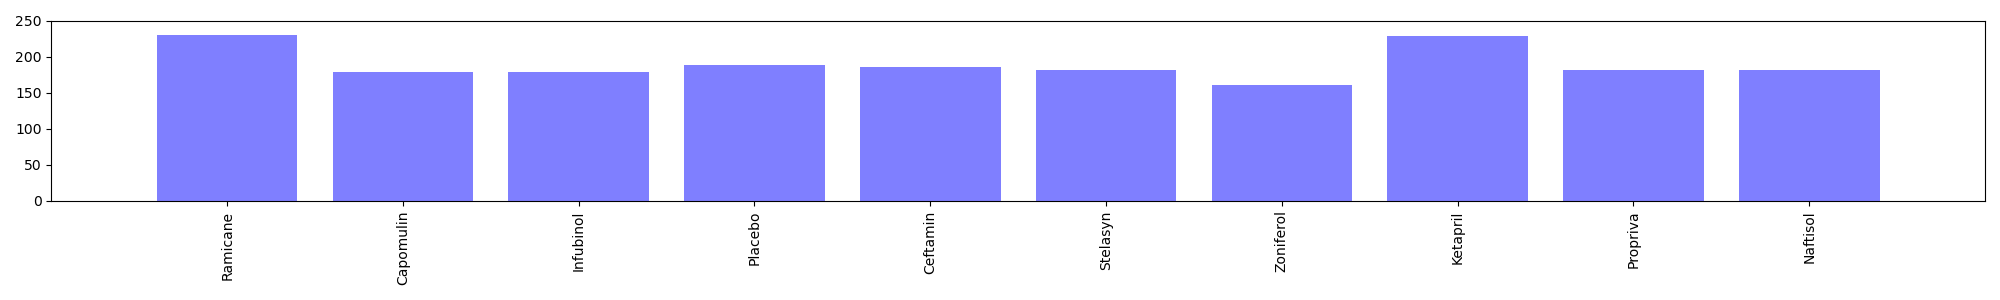

In [453]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = mouse_study["Drug Regimen"].unique()
tick_locations = [value for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, mouse_df["Mouse ID"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, rotation="vertical")
plt.xlim([-1,10])
plt.ylim([0,250])
plt.tight_layout()
plt.show()

In [430]:
mouse_sex = mouse_study.groupby('Sex')
mouse_sex_table = mouse_sex["Mouse ID"].count()
mouse_sex_df = pd.DataFrame(mouse_sex_table)
mouse_sex_df

,Mouse ID
Sex,
Female,935
Male,958


<IPython.core.display.Javascript object>


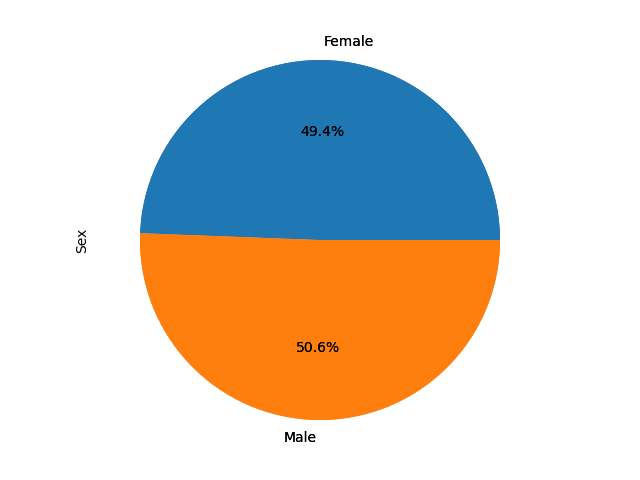

In [431]:
#Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_pie = mouse_sex_df.plot(kind="pie", y="Mouse ID", legend = False, autopct='%1.1f%%')
mouse_pie.set_ylabel("Sex")

plt.show()
plt.tight_layout()

In [432]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_sex_df["Mouse ID"], labels=["Female","Male"],
        autopct="%1.1f%%", startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [433]:
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [434]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

mouse_study["Timepoint"].max()
mouse_treatment = mouse_study.loc[(mouse_study["Drug Regimen"]=="Capomulin")|
                                  (mouse_study["Drug Regimen"]=="Ramicane")| 
                                  (mouse_study["Drug Regimen"]=="Infubinol")|    
                                  (mouse_study["Drug Regimen"]=="Ceftamin")] 

mouse_treat_final = mouse_treatment.loc[(mouse_treatment["Timepoint"]== 45)]
final_treat = mouse_treat_final.groupby(["Drug Regimen","Mouse ID"])["Tumor Volume (mm3)"].mean()
final_treat 

Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              g288        37.074024
              g316        40.159220
              i557        47.685963
                            ...    
Ramicane      q597        45.220869
              r811        37.225650
              s508        30.276232
              u196        40.667713
              z578        30.638696
Name: Tumor Volume (mm3), Length: 63, dtype: float64

In [435]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset   
# Determine outliers using upper and lower bounds


mouse_Capomulin = mouse_study.loc[(mouse_study["Drug Regimen"]=="Capomulin")]
Capomulin_quartiles = mouse_Capomulin["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq
Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)
print(f"Capomulin below {Capomulin_lower_bound} could be outliers.")
print(f"Capomulin above {Capomulin_upper_bound} could be outliers.")

mouse_Ramicane = mouse_study.loc[(mouse_study["Drug Regimen"]=="Ramicane")]
Ramicane_quartiles = mouse_Ramicane["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq
Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
print(f"Ramicane below {Ramicane_lower_bound} could be outliers.")
print(f"Ramicane above {Ramicane_upper_bound} could be outliers.")

mouse_Infubinol = mouse_study.loc[(mouse_study["Drug Regimen"]=="Infubinol")]
Infubinol_quartiles = mouse_Infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq
Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)
print(f"Infubinol below {Infubinol_lower_bound} could be outliers.")
print(f"Infubinol above {Infubinol_upper_bound} could be outliers.")

mouse_Ceftamin = mouse_study.loc[(mouse_study["Drug Regimen"]=="Ceftamin")]
Ceftamin_quartiles = mouse_Infubinol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq
Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)
print(f"Ceftamin below {Ceftamin_lower_bound} could be outliers.")
print(f"Ceftamin above {Ceftamin_upper_bound} could be outliers.")

Capomulin below 26.714832162499995 could be outliers.
Capomulin above 55.9711007025 could be outliers.
Ramicane below 24.18658646249998 could be outliers.
Ramicane above 57.48804812250001 could be outliers.
Infubinol below 32.309217298749985 could be outliers.
Infubinol above 72.31757996875001 could be outliers.
Ceftamin below 32.309217298749985 could be outliers.
Ceftamin above 72.31757996875001 could be outliers.


<IPython.core.display.Javascript object>


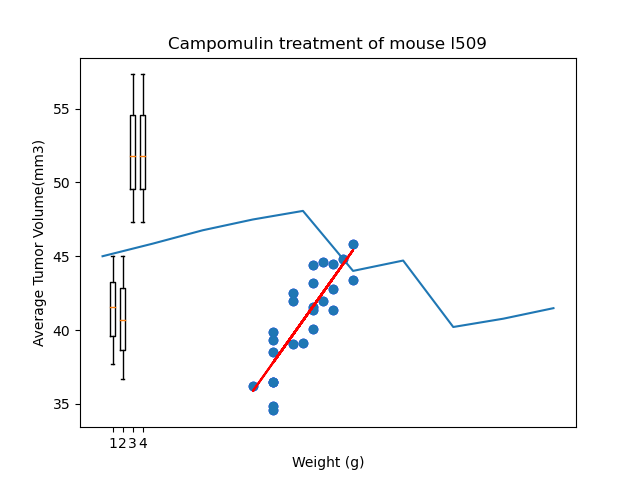

In [436]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [Capomulin_quartiles, Ramicane_quartiles, Infubinol_quartiles, Ceftamin_quartiles]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Valume (mm3)')
ax1.boxplot(data)
plt.show()

## Line and Scatter Plots

In [437]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_capomulin = mouse_study.loc[(mouse_study["Drug Regimen"]=="Capomulin") & (mouse_study["Mouse ID"]=="l509")]
x_axis = mouse_capomulin["Timepoint"]
Tumor_v = mouse_capomulin["Tumor Volume (mm3)"]
plt.plot(x_axis, Tumor_v)
plt.title('Campomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume(mm3)')
plt.show()



In [438]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_cap = mouse_study.loc[mouse_study["Drug Regimen"]=="Capomulin"]
mouse_weight = mouse_cap.groupby("Mouse ID")["Weight (g)"].mean()
Tumor_avg = mouse_cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
plt.scatter(mouse_weight, Tumor_avg, marker="o", facecolors="blue", edgecolors="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.show()


## Correlation and Regression

In [439]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_cap = mouse_study.loc[mouse_study["Drug Regimen"]=="Capomulin"]
mouse_weight = mouse_cap.groupby("Mouse ID")["Weight (g)"].mean()
Tumor_avg = mouse_cap.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
slope, intercept, r, p, std_err = st.linregress(mouse_weight, Tumor_avg)
regress_values = mouse_weight * slope + intercept
plt.scatter(mouse_weight, Tumor_avg)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume(mm3)')
plt.show()

Analysis

1. When it tested, used equal sex of mice and number of mice had each drug relatively equal.    
2. I can find the high correlation between the mice wight and tumor valume.
3. Capomulin & Ramicane have lower mean value than Infubinol & Ceftamin. 
 
